In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Manually Parse the CSV
filename = 'zombies_data - Sheet1.csv'
data = []

In [6]:
with open(filename, 'r') as f:
    lines = f.readlines()
    # Skip header (SprintSpeed, AmmoClips, Result)
    for line in lines[1:]:
        if line.strip():
            parts = line.strip().split(',')
            data.append([float(p) for p in parts])


In [7]:
# Convert to numpy array
data_matrix = np.array(data)
X_raw = data_matrix[:, :2] # Features: SprintSpeed, AmmoClips
y = data_matrix[:, 2]      # Target: Result

In [8]:
# Normalize Data (Z-Score Standardization)
# Crucial for gradient descent to converge efficiently
X_mean = np.mean(X_raw, axis=0)
X_std = np.std(X_raw, axis=0)
X_norm = (X_raw - X_mean) / X_std

In [9]:
# Add Bias Term (Intercept)
m = X_norm.shape[0]
X = np.hstack((np.ones((m, 1)), X_norm))

In [10]:
# Logistic Regression Functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        # Forward pass (Prediction)
        z = np.dot(X, theta)
        h = sigmoid(z)

        # Calculate Gradient: (1/m) * X.T * (Predictions - Actual)
        gradient = np.dot(X.T, (h - y)) / m

        # Update Weights
        theta -= alpha * gradient

    return theta

In [11]:
# Train the Model
# Hyperparameters
alpha = 0.1      # Learning rate
iterations = 2000 # Number of steps

# Initialize weights to zeros
initial_theta = np.zeros(X.shape[1])

# Run Gradient Descent
theta_final = gradient_descent(X, y, initial_theta, alpha, iterations)

In [19]:
theta_final

array([1.28369474, 5.96055882, 4.34206947])

In [12]:
# Prediction Function
def get_survival_probability(speed, ammo):
    # Normalize input using training mean/std
    speed_norm = (speed - X_mean[0]) / X_std[0]
    ammo_norm = (ammo - X_mean[1]) / X_std[1]

    # Create feature vector [1, speed_norm, ammo_norm]
    features = np.array([1, speed_norm, ammo_norm])

    # Calculate probability
    z = np.dot(features, theta_final)
    return sigmoid(z)

In [13]:
# Output Results
print(f"Model Trained. Final Weights: {theta_final}")

Model Trained. Final Weights: [1.28369474 5.96055882 4.34206947]


In [20]:
# Runner stats: 25 km/h, 1 Ammo Clip
speed_val = 25
ammo_val = 1

# probability using defined function and trained weights
prob = get_survival_probability(speed_val, ammo_val)

# Determination of class (Threshold = 0.5)
prediction = "Survive" if prob >= 0.5 else "Infected"

print(f"Runner Stats: {speed_val} km/h, {ammo_val} Ammo Clips")
print(f"Survival Probability: {prob:.4f}")
print(f"Prediction: {prediction}")

Runner Stats: 25 km/h, 1 Ammo Clips
Survival Probability: 0.9995
Prediction: Survive


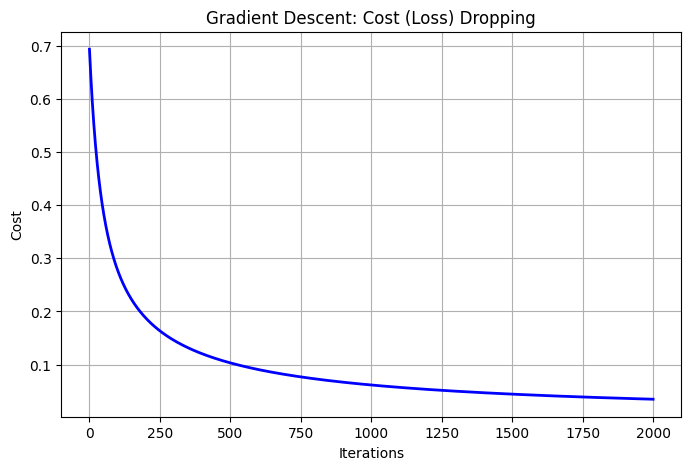

In [21]:
# Visualizing the Cost Dropping
# Using the same X, y, alpha, and iterations

cost_history = []
theta_viz = np.zeros(X.shape[1]) # Start with fresh weights for visualization
m = len(y)

for i in range(iterations):
    # 1. Forward Pass
    z = np.dot(X, theta_viz)
    h = sigmoid(z)

    # 2. Calculate Cost (Loss)
    # Formula: J = (-1/m) * sum( y*log(h) + (1-y)*log(1-h) )
    epsilon = 1e-5 # Avoid log(0) error
    cost = (-1/m) * (np.dot(y, np.log(h + epsilon)) + np.dot((1-y), np.log(1-h + epsilon)))
    cost_history.append(cost)

    # 3. Gradient Update
    gradient = np.dot(X.T, (h - y)) / m
    theta_viz -= alpha * gradient

# Plotting the Cost History
plt.figure(figsize=(8, 5))
plt.plot(range(iterations), cost_history, color='blue', linewidth=2)
plt.title('Gradient Descent: Cost (Loss) Dropping')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

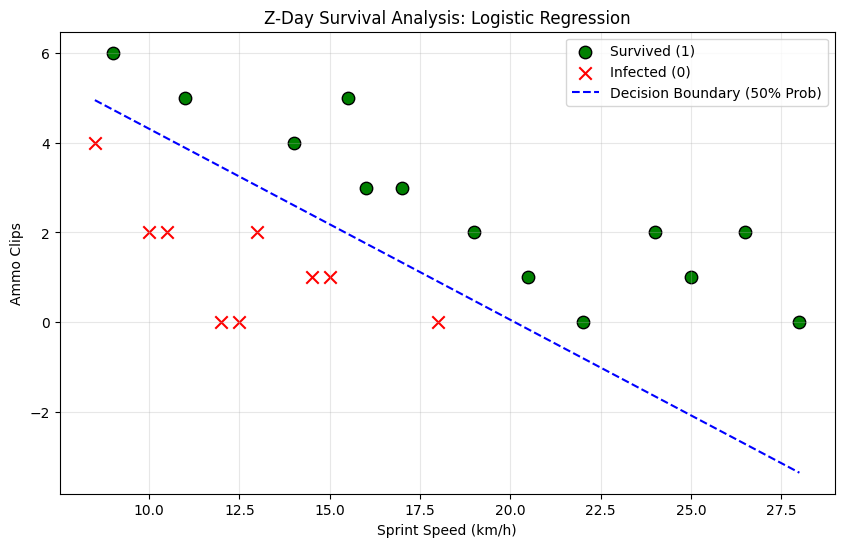

In [14]:
# Plotting Decision Boundary
plt.figure(figsize=(10, 6))
survived = data_matrix[data_matrix[:, 2] == 1]
infected = data_matrix[data_matrix[:, 2] == 0]

plt.scatter(survived[:, 0], survived[:, 1], color='green', label='Survived (1)', s=80, edgecolors='k')
plt.scatter(infected[:, 0], infected[:, 1], color='red', label='Infected (0)', s=80, marker='x')

# Calculate boundary line: theta0 + theta1*x1 + theta2*x2 = 0
x_values = np.linspace(X_raw[:, 0].min(), X_raw[:, 0].max(), 100)
# Convert x_values to normalized scale for calculation
x_norm = (x_values - X_mean[0]) / X_std[0]
# Solve for y (normalized)
y_norm = -(theta_final[0] + theta_final[1] * x_norm) / theta_final[2]
# Convert y back to original scale
boundary_y = y_norm * X_std[1] + X_mean[1]

plt.plot(x_values, boundary_y, label='Decision Boundary (50% Prob)', color='blue', linestyle='--')
plt.xlabel('Sprint Speed (km/h)')
plt.ylabel('Ammo Clips')
plt.title('Z-Day Survival Analysis: Logistic Regression')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()